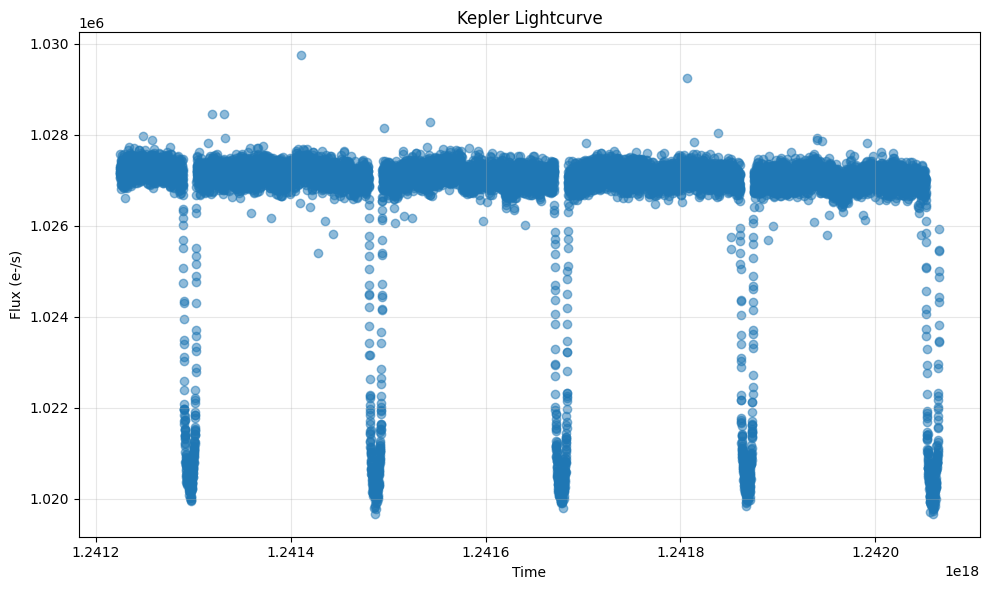

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.timeseries import TimeSeries
from astropy.units import Quantity
from phasedm import pdm

# Get an example TimeSeries dataset
example_file = get_pkg_data_filename("timeseries/kplr010666592-2009131110544_slc.fits")

# Load the data directly as an Astropy TimeSeries
ts = TimeSeries.read(example_file, format="kepler.fits")

# Extract time, flux and error
times = ts.time  # Extract the numeric values from the Time object
flux = ts["sap_flux"]  # Kepler Simple Aperture Photometry flux
error = ts["sap_flux_err"]  # Flux uncertainty

times.format = "jd"

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(np.array(times.datetime64, np.float64), flux, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Flux (e-/s)")
plt.title("Kepler Lightcurve")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("kplr")



Detected period: 190581.7375129597
Detected period (days): 2.205807147140737


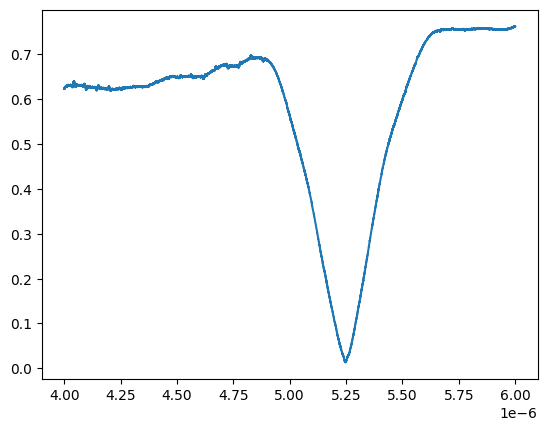

In [8]:

min_freq = 4 / int(1e6)
max_freq = 6 / int(1e6)
n_bins = 100
n_freqs = int(1e5)

valid_mask = ~np.isnan(flux.value.astype(np.float64)).astype(bool)

times = times[valid_mask]
flux = flux[valid_mask]
error = error[valid_mask]

freq, theta = pdm(
    times,
    flux,
    min_freq,
    max_freq,
    n_freqs,
    sigma=error,
    n_bins=n_bins,
    verbose=0,
)

best_freq = freq[np.argmin(theta)]
print(f"Detected period: {1/best_freq}")
print(f"Detected period (days): {(1/best_freq)/60/60/24}")



plt.figure()
plt.plot(freq, theta)
plt.show()

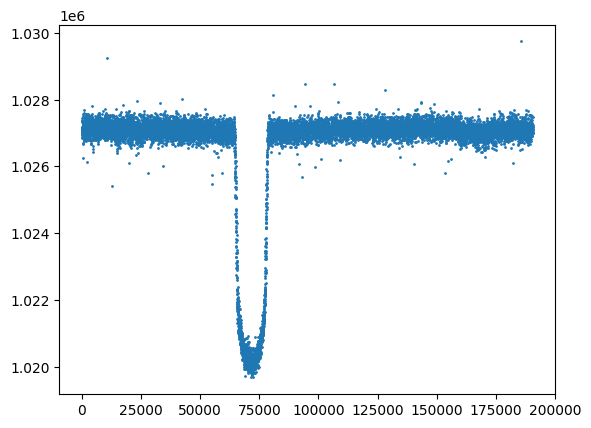

In [7]:
plt.figure()
plt.scatter(
    (
        (
            np.array(times.datetime64, np.float64)
            - np.array(times.datetime64, np.float64)[0]
        )
        / 1e9
    )
    % (1 / best_freq),
    flux.value.astype(np.float64), s = 1
)
plt.show()